In [9]:
#Import packages
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [10]:
#Generate the data using make_blobs(), a convience function in scikit-learn used to generate synthetic cluster
features, true_labels = make_blobs(n_samples = 200, centers = 3, cluster_std = 2.75, random_state = 42)

In [11]:
# the first five elements for each of the variable returnrf by make_blobs
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [12]:
#print the label for these features
true_labels[:5]

array([1, 0, 2, 2, 2])

In [13]:
#the values for all features must be transformed to the same scale, the process of transforming numerical features to use the same scale is known as features scaling or normalizing the data. It is important data preprocessing step for most distance-base machine learning algorithms because it can have a significant impact on the performance of your model
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features [:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [14]:
# Initiate the KMeans class
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [15]:
# The next step is to fit the algorithm with the scaled data
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [16]:
# Statistic from the initialization run with the lowest SSE are available as attribute of kmeans after calling .fit()
kmeans.inertia_

74.57960106819854

In [17]:
#Final location of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [18]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [19]:
# The cluster assignment are stores, a one-dimensional Numpy array
kmeans.labels_[:5]


array([2, 0, 1, 1, 1])

In [20]:
# Running elbow method to find a appropiate number of clusters
kmean_kwargs = {"init":"random","n_init":10, "max_iter":300, "random_state":42}
#create a empty list to hold the SSE for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,**kmean_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

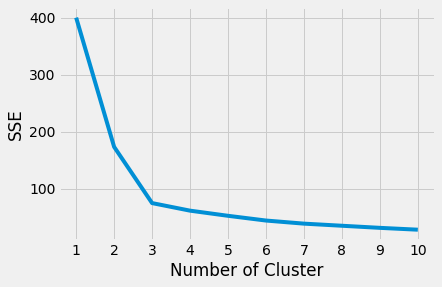

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")